In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu

%matplotlib inline


In [ ]:
experiment = pd.read_csv('/content/drive/MyDrive/experiment_lesson_4.csv')

In [ ]:
experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20196 entries, 0 to 20195
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          20196 non-null  int64  
 1   delivery_time     20196 non-null  float64
 2   district          20196 non-null  object 
 3   experiment_group  20196 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 631.3+ KB


In [ ]:
experiment.shape

(20196, 4)

In [ ]:
experiment.dtypes

,0
order_id,int64
delivery_time,float64
district,object
experiment_group,object


In [ ]:
experiment.duplicated().sum()

np.int64(0)

In [ ]:
experiment.isna().sum().sum()

np.int64(0)

In [ ]:
experiment.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [ ]:
control_and_test = experiment.groupby(['district', 'experiment_group'], as_index=False).agg({'delivery_time': 'mean'}).rename(columns = {'delivery_time': 'Mean_Time'}).pivot(index = 'district', columns= 'experiment_group', values = 'Mean_Time').reset_index()
control_and_test

experiment_group,district,control,test
0,Central,26.239163,24.608570
1,Purlieus,45.125384,41.603986
2,Suburb,63.858255,59.348485


In [ ]:
control = experiment[experiment['experiment_group'] == 'control'][['delivery_time', 'district']]
test = experiment[experiment['experiment_group'] == 'test'][['delivery_time', 'district']]

<ipython-input-13-47997a0fec64>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "district", y = "delivery_time", data=control, palette = ['red', 'green', 'blue'])


<Axes: xlabel='district', ylabel='delivery_time'>

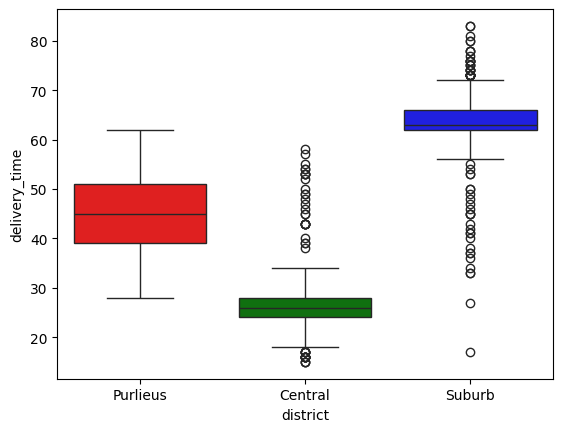

In [ ]:
sns.boxplot(x = "district", y = "delivery_time", data=control, palette = ['red', 'green', 'blue'])

<ipython-input-14-7b0695ca340c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "district", y = "delivery_time", data=test, palette = ['red', 'green', 'blue'])


<Axes: xlabel='district', ylabel='delivery_time'>

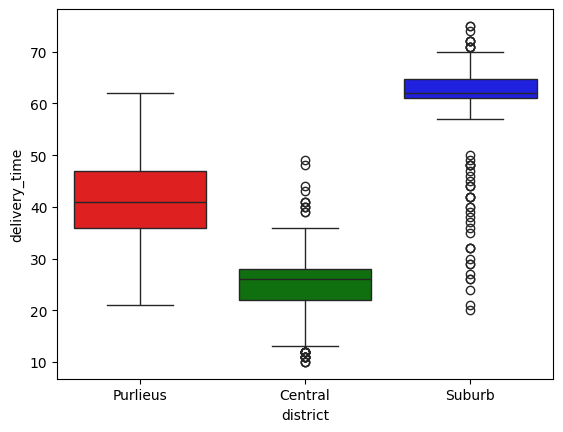

In [ ]:
sns.boxplot(x = "district", y = "delivery_time", data=test, palette = ['red', 'green', 'blue'])

Сравнение для центрального района доставки

<ipython-input-15-5c2369bc2cda>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "experiment_group", y = "delivery_time", data=experiment[experiment['district'] == 'Central'], ax = axs[0], palette='Set2')
<ipython-input-15-5c2369bc2cda>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "experiment_group", y = "delivery_time", data=experiment[experiment['district'] == 'Purlieus'], ax = axs[1], palette='Set2')
<ipython-input-15-5c2369bc2cda>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "experiment_group", y = "delivery_time", da

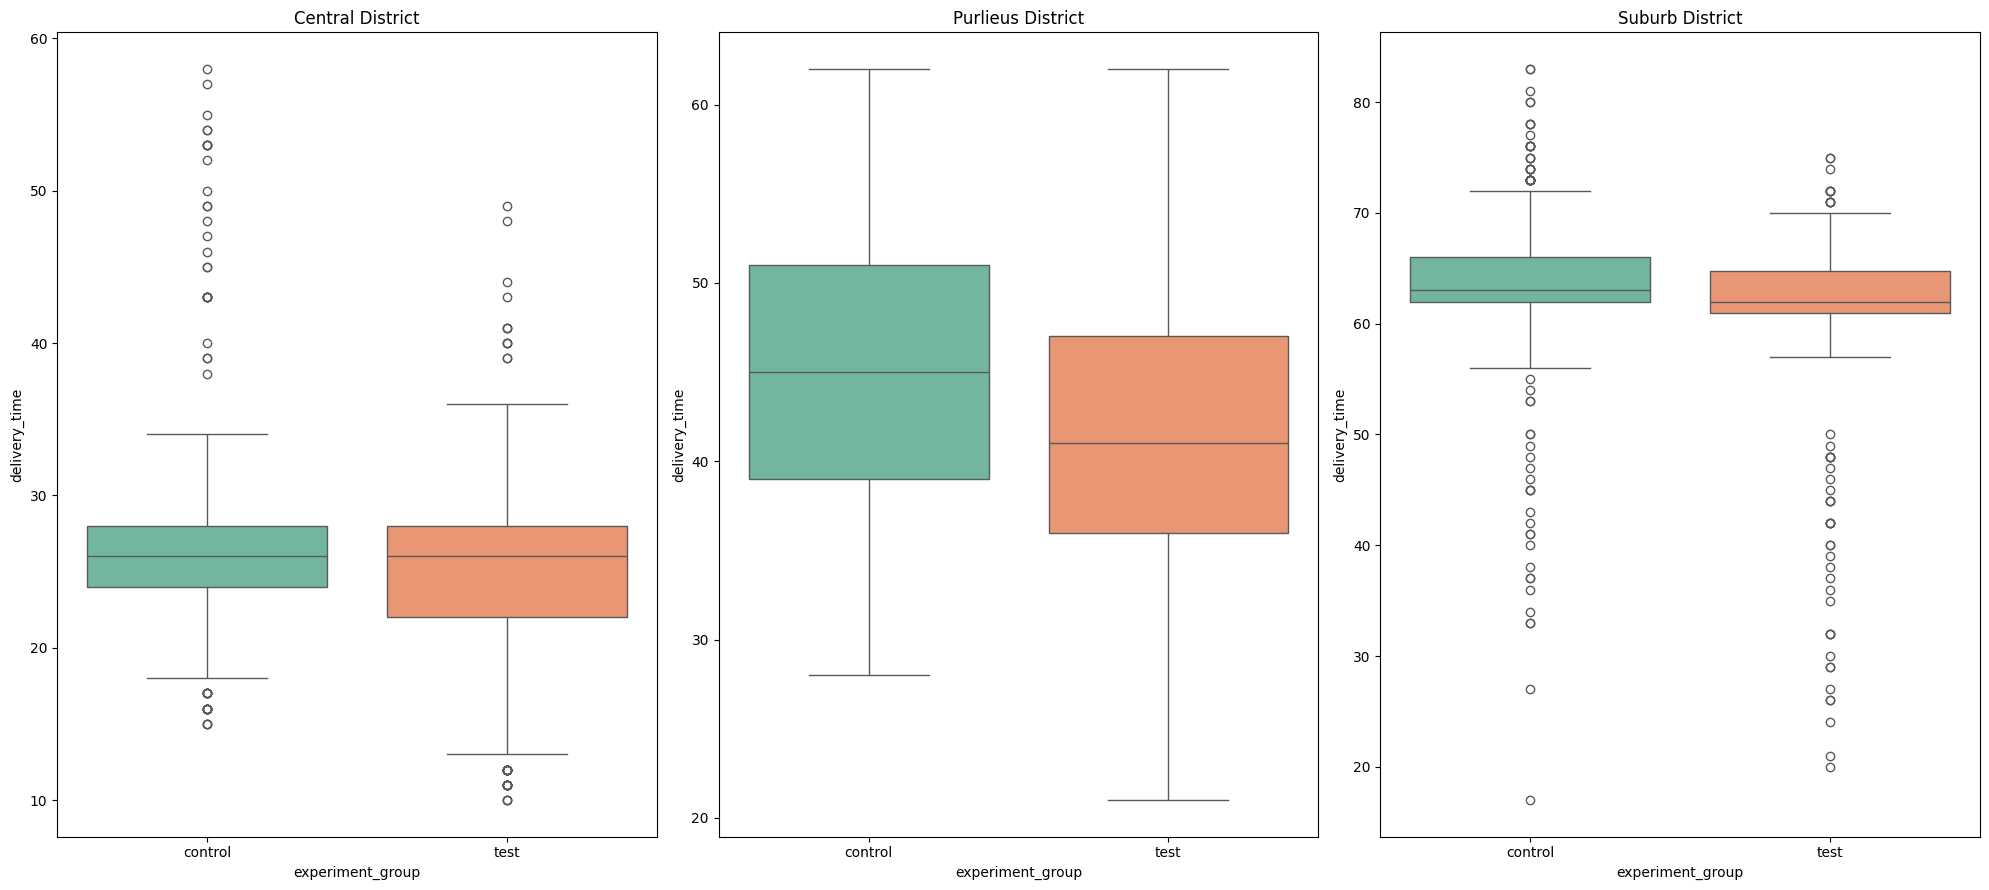

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (20, 9))

sns.boxplot(x = "experiment_group", y = "delivery_time", data=experiment[experiment['district'] == 'Central'], ax = axs[0], palette='Set2')

sns.boxplot(x = "experiment_group", y = "delivery_time", data=experiment[experiment['district'] == 'Purlieus'], ax = axs[1], palette='Set2')

sns.boxplot(x = "experiment_group", y = "delivery_time", data=experiment[experiment['district'] == 'Suburb'], ax = axs[2], palette='Set2')


axs[0].set_title('Central District')
axs[1].set_title('Purlieus District')
axs[2].set_title('Suburb District')

plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols


In [ ]:
stats.ttest_ind(control['delivery_time'], test['delivery_time'])

TtestResult(statistic=np.float64(43.03582663183714), pvalue=np.float64(0.0), df=np.float64(20194.0))

In [ ]:
control_central = experiment[(experiment['district'] == 'Central') & (experiment['experiment_group'] == 'control')]['delivery_time']
control_purlieus = experiment[(experiment['district'] == 'Purlieus') & (experiment['experiment_group'] == 'control')]['delivery_time']
control_suburb = experiment[(experiment['district'] == 'Suburb') & (experiment['experiment_group'] == 'control')]['delivery_time']


test_central = experiment[(experiment['district'] == 'Central') & (experiment['experiment_group'] == 'test')]['delivery_time']
test_purlieus = experiment[(experiment['district'] == 'Purlieus') & (experiment['experiment_group'] == 'test')]['delivery_time']
test_suburb = experiment[(experiment['district'] == 'Suburb') & (experiment['experiment_group'] == 'test')]['delivery_time']



In [ ]:
ttest_ind(control_central, test_central)

TtestResult(statistic=np.float64(7.320623317485099), pvalue=np.float64(3.353466670863408e-13), df=np.float64(2394.0))

In [ ]:
ttest_ind(control_purlieus, test_purlieus)

TtestResult(statistic=np.float64(30.96244889717167), pvalue=np.float64(8.33327743897822e-205), df=np.float64(16958.0))

In [ ]:
ttest_ind(control_suburb, test_suburb)

TtestResult(statistic=np.float64(7.268308345706691), pvalue=np.float64(8.343717164406963e-13), df=np.float64(838.0))

In [ ]:
stat_mod = smf.ols(formula = "delivery_time ~ C(experiment_group)*C(district)", data = experiment).fit()
anova_lm(stat_mod)

,df,sum_sq,mean_sq,F,PR(>F)
C(experiment_group),1.0,1.828737e+05,182873.652978,3567.501193,0.000000e+00
C(district),2.0,9.572332e+05,478616.595216,9336.857696,0.000000e+00
C(experiment_group):C(district),2.0,1.752451e+03,876.225384,17.093414,3.825625e-08
Residual,20190.0,1.034959e+06,51.260993,NaN,NaN


<Axes: xlabel='district', ylabel='delivery_time'>

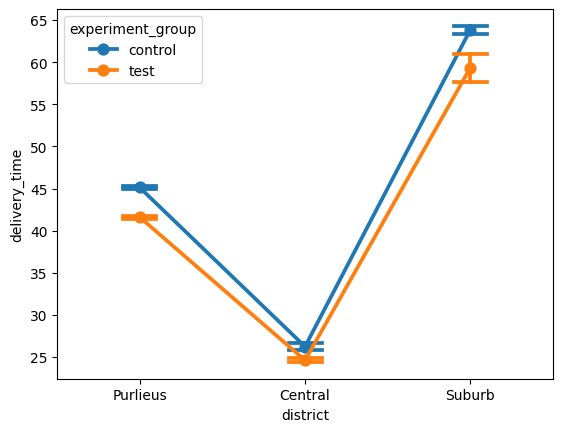

In [ ]:
sns.pointplot(x = 'district', y = 'delivery_time', hue = 'experiment_group', data = experiment, capsize = .2)

<Axes: xlabel='district', ylabel='delivery_time'>

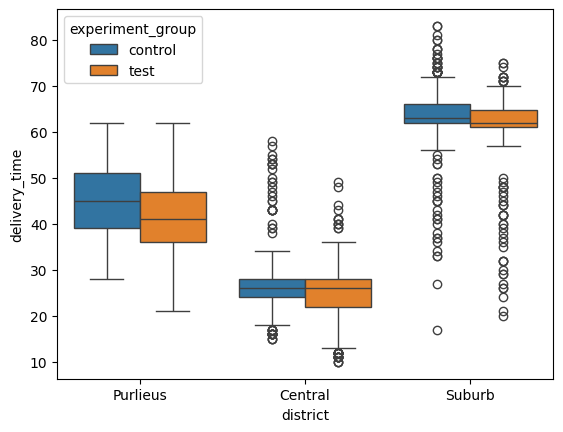

In [ ]:
sns.boxplot(x = 'district', y = 'delivery_time', hue = 'experiment_group', data = experiment)

<ipython-input-33-7ac80dba51b5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(experiment[(experiment['district'] == 'Central') & (experiment['experiment_group'] == 'control')]['delivery_time'], ax=axs[0][0])
<ipython-input-33-7ac80dba51b5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(expe

<Axes: xlabel='log_time', ylabel='Density'>

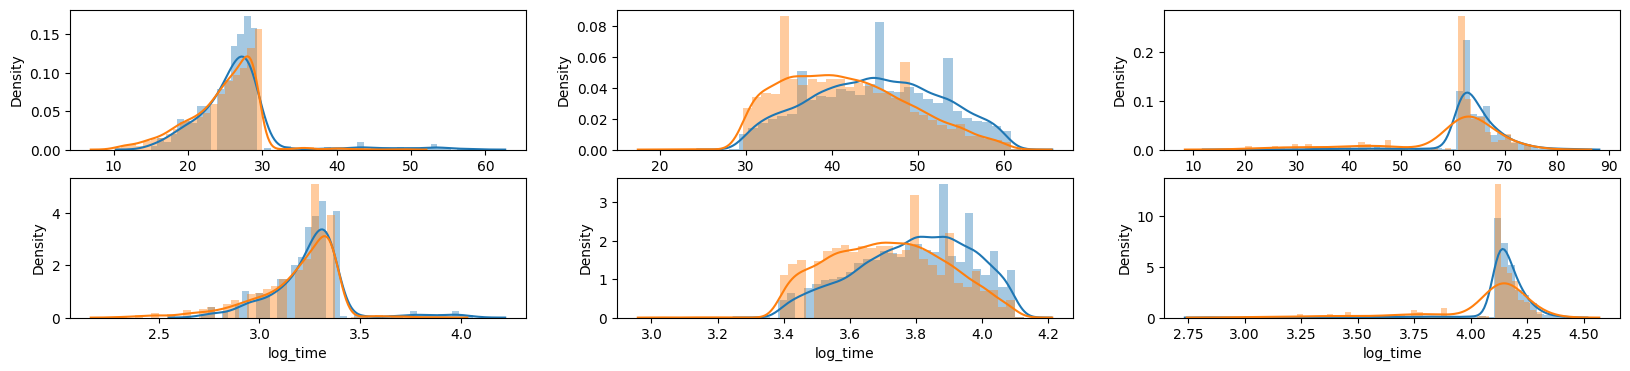

In [ ]:
fig, axs= plt.subplots(2, 3, figsize = (20, 4))
sns.distplot(experiment[(experiment['district'] == 'Central') & (experiment['experiment_group'] == 'control')]['delivery_time'], ax=axs[0][0])
sns.distplot(experiment[(experiment['district'] == 'Purlieus') & (experiment['experiment_group'] == 'control')]['delivery_time'], ax=axs[0][1])
sns.distplot(experiment[(experiment['district'] == 'Suburb') & (experiment['experiment_group'] == 'control')]['delivery_time'], ax=axs[0][2])

sns.distplot(experiment[(experiment['district'] == 'Central') & (experiment['experiment_group'] == 'test')]['delivery_time'], ax=axs[0][0])
sns.distplot(experiment[(experiment['district'] == 'Purlieus') & (experiment['experiment_group'] == 'test')]['delivery_time'], ax=axs[0][1])
sns.distplot(experiment[(experiment['district'] == 'Suburb') & (experiment['experiment_group'] == 'test')]['delivery_time'], ax=axs[0][2])

sns.distplot(experiment[(experiment['district'] == 'Central') & (experiment['experiment_group'] == 'control')]['log_time'], ax=axs[1][0])
sns.distplot(experiment[(experiment['district'] == 'Purlieus') & (experiment['experiment_group'] == 'control')]['log_time'], ax=axs[1][1])
sns.distplot(experiment[(experiment['district'] == 'Suburb') & (experiment['experiment_group'] == 'control')]['log_time'], ax=axs[1][2])

sns.distplot(experiment[(experiment['district'] == 'Central') & (experiment['experiment_group'] == 'test')]['log_time'], ax=axs[1][0])
sns.distplot(experiment[(experiment['district'] == 'Purlieus') & (experiment['experiment_group'] == 'test')]['log_time'], ax=axs[1][1])
sns.distplot(experiment[(experiment['district'] == 'Suburb') & (experiment['experiment_group'] == 'test')]['log_time'], ax=axs[1][2])

In [ ]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 13.5 MB/s eta 0:00:00


In [ ]:
import pingouin as pg
pg.normality(data = experiment[experiment['experiment_group'] == 'control'], dv="delivery_time", group="district", method="normaltest")

,W,pval,normal
district,,,
Purlieus,896.248685,2.410298e-195,False
Central,371.153205,2.541590e-81,False
Suburb,361.236676,3.617867e-79,False


In [ ]:
experiment['log_time'] = np.log(experiment['delivery_time'])
pg.normality(data = experiment[experiment['experiment_group'] == 'control'], dv="log_time", group="district", method="normaltest")

,W,pval,normal
district,,,
Purlieus,592.676228,2.004436e-129,False
Central,115.964480,6.586174e-26,False
Suburb,639.398903,1.433152e-139,False


<ipython-input-32-fadbcc9db84e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(experiment[(experiment['district'] == 'Central') & (experiment['experiment_group'] == 'control')]['log_time'], ax=axs[0])
<ipython-input-32-fadbcc9db84e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(experiment[(

<Axes: xlabel='log_time', ylabel='Density'>

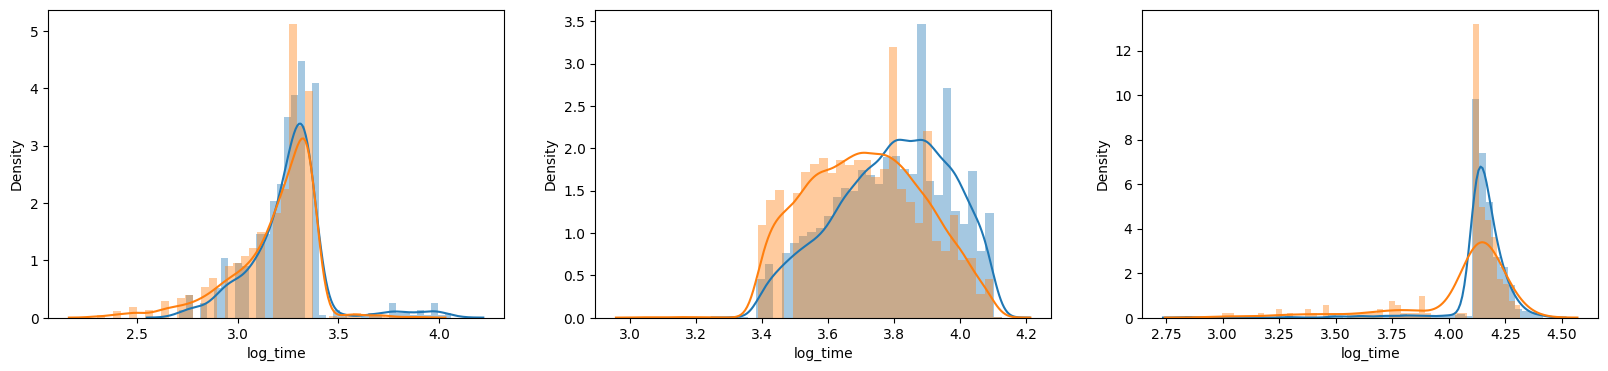

In [ ]:
fig, axs= plt.subplots(1, 3, figsize = (20, 4))
